# Исследование надёжности заёмщиков

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Открытие-таблицы-и-изучение-общей-информации-о-данных" data-toc-modified-id="Открытие-таблицы-и-изучение-общей-информации-о-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Открытие таблицы и изучение общей информации о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Определение-и-заполнение-пропущенных-значений" data-toc-modified-id="Определение-и-заполнение-пропущенных-значений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение и заполнение пропущенных значений</a></span><ul class="toc-item"><li><span><a href="#children" data-toc-modified-id="children-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>children</a></span></li><li><span><a href="#dob_years" data-toc-modified-id="dob_years-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>dob_years</a></span></li><li><span><a href="#days_employed" data-toc-modified-id="days_employed-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>days_employed</a></span></li><li><span><a href="#dob_years" data-toc-modified-id="dob_years-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>dob_years</a></span></li><li><span><a href="#days_employed" data-toc-modified-id="days_employed-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>days_employed</a></span></li><li><span><a href="#total_income" data-toc-modified-id="total_income-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>total_income</a></span></li></ul></li><li><span><a href="#Замена-вещественного-типа-данных-на-целочисленный" data-toc-modified-id="Замена-вещественного-типа-данных-на-целочисленный-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Замена вещественного типа данных на целочисленный</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li><li><span><a href="#Выделение-лемм-в-значениях-столбца-с-целями-получения-кредита" data-toc-modified-id="Выделение-лемм-в-значениях-столбца-с-целями-получения-кредита-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выделение лемм в значениях столбца с целями получения кредита</a></span></li><li><span><a href="#Использованные-словари" data-toc-modified-id="Использованные-словари-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Использованные словари</a></span></li></ul></li><li><span><a href="#Выявление-зависимостей-" data-toc-modified-id="Выявление-зависимостей--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выявление зависимостей <a id="dependencies"></a></a></span><ul class="toc-item"><li><span><a href="#Зависимость-между-наличием-детей-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-наличием-детей-и-возвратом-кредита-в-срок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Зависимость между наличием детей и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-семейным-положением-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-семейным-положением-и-возвратом-кредита-в-срок-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Зависимость между семейным положением и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Зависимость между уровнем дохода и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-возврата-кредита-от-цели" data-toc-modified-id="Зависимость-возврата-кредита-от-цели-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Зависимость возврата кредита от цели</a></span></li></ul></li><li><span><a href="#Общий-вывод-—-профиль-заемщика" data-toc-modified-id="Общий-вывод-—-профиль-заемщика-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод — профиль заемщика</a></span></li></ul></div>

## Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter
import numpy as np

## Открытие таблицы и изучение общей информации о данных

In [2]:
# data = pd.read_csv('data.csv')
data = pd.read_csv('/datasets/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Выявленные особенности:

В датафрейме 21525 записей, пропуски присутствуют в столбцах со стажем и доходом. Стаж представлен отрицательными значениями. Значения в образовании имеют разный регистр, но они все категоризуются в столбце education_id. Такой же столбец с категориями присутствует для семейного положения. Цели не категоризованы, имеют разную формулировку.

## Предобработка данных

### Определение и заполнение пропущенных значений

Исходя из общей информации о датафрейме, нулевые значения присутствуют в стобцах total_income и days_employed.

In [4]:
null_income = len(data[data['total_income'].isnull() & data['days_employed'].isnull()])
print('Количество пропусков {}, это {:.2%} от всех данных'.format(null_income, null_income / len(data)))

Количество пропусков 2174, это 10.10% от всех данных


Количество пропусков превышает 10%, следовательно их лучше не удалять, чтобы не потерять важные данные. Предположительно, пропуски являются случайными (где не указан стаж, там не указан доход, но других закономерностей не замечено — остальные значения различаются).
Попробуем восполнить пропуски в столбцах с доходом и стажем, однако для этого нужно разобраться с некоторыми другими столбцами.

#### children

Было решено удалять записи, в которых информация отсутствует в нескольких графах. Например, в столбце children есть такие значения как -1 и 20. Они похожи на плейсхолдеры, означающие отсутствие информации. Соответственно, находим строки, в которых нет информации о детях, доходе и стаже.

In [5]:
# 20 детей, отсутствуют данные о з/п и стаже
data[(data['children'] == 20) & (data['days_employed'].isnull()) & (data['total_income'].isnull())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3302,20,NaN,35,среднее,1,Не женат / не замужем,4,F,госслужащий,0,NaN,профильное образование
3396,20,NaN,56,высшее,0,женат / замужем,0,F,компаньон,0,NaN,высшее образование
6198,20,NaN,35,высшее,0,Не женат / не замужем,4,M,компаньон,0,NaN,жилье
8430,20,NaN,60,среднее,1,вдовец / вдова,2,F,пенсионер,0,NaN,покупка жилья
12909,20,NaN,25,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,операции с жильем
15976,20,NaN,39,среднее,1,Не женат / не замужем,4,F,сотрудник,0,NaN,покупка недвижимости
17286,20,NaN,50,высшее,0,в разводе,3,F,сотрудник,0,NaN,покупка коммерческой недвижимости
19774,20,NaN,59,среднее,1,гражданский брак,1,F,пенсионер,0,NaN,сыграть свадьбу
21390,20,NaN,53,среднее,1,женат / замужем,0,M,компаньон,0,NaN,покупка жилой недвижимости


In [6]:
# -1 детей, отсутствуют данные о з/п и стаже
data[(data['children'] == -1) & (data['days_employed'].isnull()) & (data['total_income'].isnull())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
941,-1,NaN,57,Среднее,1,женат / замужем,0,F,пенсионер,0,NaN,на покупку своего автомобиля
7615,-1,NaN,35,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,образование
13786,-1,NaN,42,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,автомобиль


In [7]:
# удаляю строки с пропрущенными данными из датафрейма
data = data.drop(data[(data['children'] == 20) & (data['days_employed'].isnull()) & (data['total_income'].isnull())].index)
data = data.drop(data[(data['children'] == -1) & (data['days_employed'].isnull()) & (data['total_income'].isnull())].index)

Посмотрим аномальные значения в первом столбце — кол-во детей

In [8]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       67
-1        44
 4        41
 5         9
Name: children, dtype: int64

Эти пропуски я сочла случайными, поскольку вероятность пропуска в этом столбце не зависит от значений в других столбцах, и его нельзя восстановить по другим доступным параметрам. Возможно, у этих людей детей нет, и эти значения — альтернатива для прочерка. В связи с этим было решено заменить значения -1 и 20 на 0. 

In [9]:
# заменим значения -1 и 20 на 0
data['children'] = data['children'].replace(-1, 0)
data['children'] = data['children'].replace(20, 0)
data['children'].value_counts()

0    14260
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

#### dob_years

Рассмотрим столбец dob_years, в котором хранится возраст, поскольку на его основе можно будет заполнить пропуски в столбце со стажем.

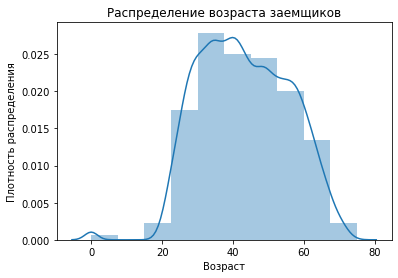

In [10]:
ax_age = sns.distplot(data['dob_years'], bins=10)
ax_age.set_xlabel('Возраст')
ax_age.set_ylabel('Плотность распределения')
ax_age.set_title('Распределение возраста заемщиков')
plt.show()

В этом столбце есть записи о возрасте, меньше 18. Было решено удалить строки с таким возрастом, и где нет данных о стаже и з/п, поскольку эти данные восстановить почти невозможно.

In [11]:
# считаем количество таких строк в процентах
null_age_income = data[(data['dob_years'] < 18) & (data['days_employed'].isnull()) & (data['total_income'].isnull())]
(len(null_age_income) / len(data)) * 100

0.04648352159159578

In [12]:
# процент оказался очень маленьким, можно удалить
data = data.drop(null_age_income.index)

In [13]:
data[(data['dob_years'] < 18)]['dob_years'].count()

91

Остается еще 91 значение, которые можно попробовать восстановить. Как вариант, можно заполнить отсутствующие значения следующим образом: если человек получил среднее образование (1), то к его стажу можно прибавить 18 (возраст, с которого можно работать); если человек получил высшее образование (0), то прибавлять 22 (обычно в этом возрасте заканчивают бакалавриат); если образование высшее неоконченное (2), то +20 (начал работать на 2 курсе). Но сначала нужно перевести все значения столбца days_employed в годы.

#### days_employed

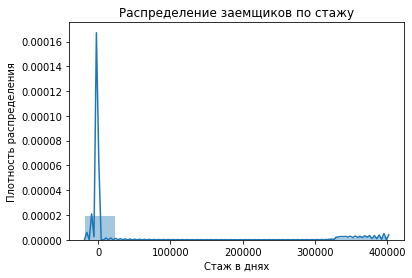

In [14]:
ax_exp = sns.distplot(data['days_employed'], bins=10)
ax_exp.set_xlabel('Стаж в днях')
ax_exp.set_ylabel('Плотность распределения')
ax_exp.set_title('Распределение заемщиков по стажу')
plt.show()

В столбце появляются не только пропуски, но и множество отрицательных значений. Это явно является ошибкой, поскольку столбец предполагает кол-во дней стажа, а это значение точно не может быть отрицательным. Также в столбце есть аномальные значения — 300-400 тыс. рабочих дней, что в годах равняется примерно 800-1000 лет стажа. Эти значения также необходимо привести к адекватным, либо удалить.

In [15]:
negative_days = data[data['days_employed'] < 0]['days_employed'].count()
excessive_days = data[data['days_employed'] > 20000]['days_employed'].count()
print('Отрицательных значений — {}, слишком больших — {}'.format(negative_days, excessive_days))

Отрицательных значений — 15906, слишком больших — 3445


In [16]:
data[data['days_employed'] > 20000]['dob_years'].value_counts()[:10]

59    254
60    243
62    235
61    214
57    212
58    208
63    192
56    184
64    179
55    162
Name: dob_years, dtype: int64

Было решено привести все значения к модулю, а дни перевести в годы (в годах стаж выглядит привычнее). В строках с аномально большим стажем возраст людей преимущественно составляет 50-70 лет. Разделим эти значения на 30 из того соображения, что человек к этому возрасту может проработать лет 30-40 (это 10-15 тыс. дней при 365 днях в году), и если делить 400 000 на 30, то примерно такое число лет и получается.

In [17]:
# функция для перевода дней стажа в годы
def days_to_years(days):
    if days < 0:
        days = abs(days)
        years = days / 365
        return round(years, 1)
    elif days > 0:
        days = days / 30
        years = days / 365
        return round(years, 1)
    else:
        return days #возврат в случае 0 или NaN

In [18]:
# создаем столбец с годами стажа
data['years_employed'] = data['days_employed'].apply(days_to_years)
# удаляем столбец с днями
data = data.drop(['days_employed'], axis=1)

Не забудем заполнить пропуски в dob_years
#### dob_years

In [19]:
# функця для восстановления возраста
def recreate_age(row):
    if row['dob_years'] == 0:    
        experience = round(row['years_employed'])
        education = row['education_id']
        if education is 1:
            row['dob_years'] = experience + 18
        elif education is 0:
            row['dob_years'] = experience + 22
        else:
            row['dob_years'] = experience + 20
    return row

In [20]:
data = data.apply(recreate_age, axis=1)

Удалим строки, где стаж превышает возраст

In [21]:
data[data['years_employed'] > data['dob_years']]['dob_years'].count() # смотрим их число

11

In [22]:
data = data.drop(data[data['years_employed'] > data['dob_years']].index) # удаляем

#### days_employed
Вернемся к столбцу со стажем. Заполняем пропуски средним значением по соц. группе. Для этого будем брать возраст, образование, пол.

In [23]:
data['years_employed'] = data.groupby(['education', 
                                     'gender', 
                                     'dob_years'])['years_employed'].apply(lambda x: x.fillna(x.mean()))

In [24]:
data['years_employed'].isnull().sum()

20

Остается еще 20 пустых значений, для которых не нашлось подходящей группы. Количество небольшое, можно удалить.

In [25]:
data.dropna(subset = ['years_employed'], inplace = True)

In [26]:
data['years_employed'].isnull().sum()

0

#### total_income

Далее перейдем к столбцу с заработком. Было решено заменять отсутствующие значения на медиану по соц. группе. Для этого рассмотрим образование, пол и тип занятости.

In [27]:
data['total_income'] = data.groupby(['income_type', 
                                     'gender', 
                                     'education'])['total_income'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [28]:
data['total_income'].isnull().sum()

1

Остается еще 1 пустое значение, для которого не нашлось подходящей группы. Количество небольшое, можно удалить.

In [29]:
data.dropna(subset = ['total_income'], inplace = True)

In [30]:
data['total_income'].isnull().sum()

0

In [31]:
# проверяем, все ли NaN удалены
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21524
Data columns (total 12 columns):
children            21471 non-null int64
dob_years           21471 non-null int64
education           21471 non-null object
education_id        21471 non-null int64
family_status       21471 non-null object
family_status_id    21471 non-null int64
gender              21471 non-null object
income_type         21471 non-null object
debt                21471 non-null int64
total_income        21471 non-null float64
purpose             21471 non-null object
years_employed      21471 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


Как итог, строки, в которых отстутствуют значения сразу в нескольких столбцах (более 2), были удалены. Пропуски, которые можно было заполнить по соседним столбцам, были восстановлены с помощью среднего или медианного значения по соц. группе. Аномальные значения (отрицательные или слишком большие) были преобразованы на основе здравого смысла.

### Замена вещественного типа данных на целочисленный

Тип float присутствует в столбцах total_income и years_employed. В качестве метода смены типа данных выберем astype, поскольку он позволяет быстро поменять тип значений во всем столбце на необходимый нам. Также применим к значениям метод round, чтобы стаж свыше полугода, например, никуда не потерялся.

In [32]:
data['total_income'] = round(data['total_income']).astype(int)
data['years_employed'] = round(data['years_employed']).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21524
Data columns (total 12 columns):
children            21471 non-null int64
dob_years           21471 non-null int64
education           21471 non-null object
education_id        21471 non-null int64
family_status       21471 non-null object
family_status_id    21471 non-null int64
gender              21471 non-null object
income_type         21471 non-null object
debt                21471 non-null int64
total_income        21471 non-null int64
purpose             21471 non-null object
years_employed      21471 non-null int64
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


### Удаление дубликатов

Посмотрим, есть ли в датафрейме дублированные строки.

Чтобы отследить дубликаты, значения во всех строках должны иметь одинковый формат, в том числе и сведения об образовании. Они сейчас представлены в разных регистрах, нужно это исправить.

In [33]:
data['education'] = data['education'].apply(lambda x: x.lower())

In [34]:
data[data.duplicated() == True] # способ позволяет вывести целые строки на экран, чтобы посмотреть, какие именно строки совпали,
                                # а также оценить их количество

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
2849,0,41,среднее,1,женат / замужем,0,F,сотрудник,0,124666,покупка жилья для семьи,6
4182,1,34,высшее,0,гражданский брак,1,F,сотрудник,0,142495,свадьба,3
4851,0,60,среднее,1,гражданский брак,1,F,пенсионер,0,112410,свадьба,30
5557,0,58,среднее,1,гражданский брак,1,F,пенсионер,0,112410,сыграть свадьбу,23
7808,0,57,среднее,1,гражданский брак,1,F,пенсионер,0,112410,на проведение свадьбы,24
8583,0,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,139362,дополнительное образование,24
9238,2,34,среднее,1,женат / замужем,0,F,сотрудник,0,124666,покупка жилья для сдачи,5
9528,0,66,среднее,1,вдовец / вдова,2,F,пенсионер,0,112410,операции со своей недвижимостью,30
9627,0,56,среднее,1,женат / замужем,0,F,пенсионер,0,112410,операции со своей недвижимостью,22
10462,0,62,среднее,1,женат / замужем,0,F,пенсионер,0,112410,покупка коммерческой недвижимости,29


Дубликаты могли появиться в связи с тем, что для заполнения пропусков в доходе мы использовали медианы по соцгруппе, и данные могли в итоге полностью совпасть. Либо дубликаты были изначально, поскольку данные могли быть собраны по нескольким банкам, и заемщики могли получать кредиты сразу в нескольких.

Удалим дубликаты методом drop_duplicates(), поскольку он удобен в применении. Не забудем сбросить индекс, чтобы все строки в датафрейм шли по порядку.

In [35]:
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 12 columns):
children            21417 non-null int64
dob_years           21417 non-null int64
education           21417 non-null object
education_id        21417 non-null int64
family_status       21417 non-null object
family_status_id    21417 non-null int64
gender              21417 non-null object
income_type         21417 non-null object
debt                21417 non-null int64
total_income        21417 non-null int64
purpose             21417 non-null object
years_employed      21417 non-null int64
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### Выделение лемм в значениях столбца с целями получения кредита

Чтобы найти основные цели, нужно провести лемматизацию всех строк столбца purpose и посчитать их частотность. Для лемматизации будем использовать библиотеку pymystem и принадлежащий ей метод lemmatize. Библиотека уже импортирована выше.

In [36]:
m = Mystem()
all_lemmas = []
for row in data['purpose']: # собираем все леммы в один список
    row_lemmas = m.lemmatize(row)
    for lemma in row_lemmas:
        if (lemma != ' ') and (lemma != '\n'):
            all_lemmas.append(lemma)
Counter(all_lemmas) # считаем встречамость каждой из лемм

Counter({'покупка': 5888,
         'жилье': 4453,
         'приобретение': 460,
         'автомобиль': 4297,
         'дополнительный': 906,
         'образование': 4004,
         'сыграть': 767,
         'свадьба': 2330,
         'операция': 2594,
         'с': 2908,
         'на': 2223,
         'проведение': 771,
         'для': 1290,
         'семья': 638,
         'недвижимость': 6333,
         'коммерческий': 1307,
         'жилой': 1227,
         'строительство': 1877,
         'собственный': 635,
         'подержать': 478,
         'свой': 2226,
         'со': 625,
         'заниматься': 903,
         'сделка': 939,
         'подержанный': 485,
         'получение': 1310,
         'высокий': 1369,
         'профильный': 435,
         'сдача': 652,
         'ремонт': 606})

Были определены следующие цели, исходя из значений в столбце purpose: недвижимость, автомобиль, образование, свадьба. Заменим каждое значение в столбце на соответствующую цель. Для этого лемматизируем их и найдем нужную лемму в каждом. 


In [37]:
# создаем функцию, которая принимает на вход строку и применяет к ней метод lemmatize, после чего находит в получившемся списке 
# лемм одну из целей, на которую люди обычно берут кредит, и возвращает вместо изначальной строки новую.
def lemmatize_purpose(purpose):
    lemmas = m.lemmatize(purpose)
    if ('жилье' in lemmas) or ('недвижимость' in lemmas):
        return 'недвижимость'
    if 'автомобиль' in lemmas:
        return 'автомобиль'
    if 'образование' in lemmas:
        return 'образование'
    if 'свадьба' in lemmas:
        return 'свадьба'
    else:
        return purpose

In [38]:
data['purpose'] = data['purpose'].apply(lemmatize_purpose) # применим функцию лемматизации к столбцу purpose

In [39]:
data['purpose'].value_counts()

недвижимость    10786
автомобиль       4297
образование      4004
свадьба          2330
Name: purpose, dtype: int64

### Использованные словари

В представленных данных используется словарь для уровня образования — столбцы education, education_id. Поскольку в столбце education записи были представлены в разных регистрах, и, соответственно, автоматически определялись как разные категории, такой словарь, применяющий числовые обозначения категорий, помог объединить нужные данные.

In [40]:
data.groupby('education_id')['education'].value_counts()

education_id  education          
0             высшее                  5238
1             среднее                15160
2             неоконченное высшее      734
3             начальное                279
4             ученая степень             6
Name: education, dtype: int64

Также использовался словарь Counter для подсчета встречаемости лемм. С его помощью можно наглядно определить частотность той или иной цели для получения кредита.

## Выявление зависимостей <a id="dependencies"></a>

### Зависимость между наличием детей и возвратом кредита в срок

In [41]:
total_debts = data['debt'].sum()
print('Всего невыплаченных кредитов: {}'.format(total_debts)) # выведем общее число кредитов
print('В процентах это {:.2%}'.format(total_debts / len(data)))

Всего невыплаченных кредитов: 1738
В процентах это 8.12%


Процент людей, не выплативших кредит, в зависимости от кол-ва детей.

In [42]:
def count_percent(num):
    return round(np.mean(num) * 100, 2)

In [43]:
pd.pivot_table(data, values='debt', index='children', columns=None, aggfunc=count_percent, dropna=True).sort_values(by='debt')

,debt
children,
5,0.00
0,7.54
3,8.21
1,9.24
2,9.41
4,9.76


Выходит, что люди, не имеющие детей или имеющие 5 детей, с большей вероятностью отдадут кредит. С меньшей вероятностью отдадут кредит люди, имеющие 4 и 2 детей. Предположение: людям без детей не приходится тратить деньги на их содержание, а значит, они более свободны в финансовом плане. Люди с 5 детьми либо вообще редко встречаются и нет достаточно объемной выборки по их задолжностям, либо они получают достаточную сумму субсидий для покрытия долгов.

### Зависимость между семейным положением и возвратом кредита в срок

In [44]:
pd.pivot_table(data, values='debt', index='family_status', columns=None, aggfunc=count_percent, 
                                                                           dropna=True).sort_values(by='debt')

,debt
family_status,
вдовец / вдова,6.59
в разводе,7.14
женат / замужем,7.54
гражданский брак,9.34
Не женат / не замужем,9.76


Люди, которые никогда не были в браке, либо находятся в гражданском браке, реже возвращают кредиты, чем вдовцы и люди, прошедшие развод. Предположение: люди, не вступавшие в брак, имеют финансовые возможности чуть ниже, чем семейные, поскольку бюджет семейных складывается из двух доходов.

### Зависимость между уровнем дохода и возвратом кредита в срок

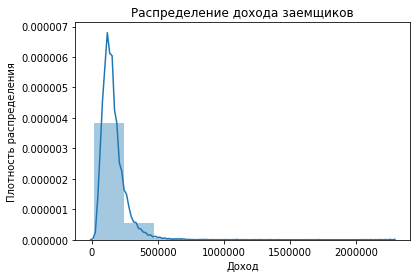

In [45]:
ax_exp = sns.distplot(data['total_income'], bins=10)
ax_exp.set_xlabel('Доход')
ax_exp.set_ylabel('Плотность распределения')
ax_exp.set_title('Распределение дохода заемщиков')
plt.show()

Чтобы наглядно посмотреть, зависит ли возврат кредита от дохода, разобъем доход на несколько категорий, по которым высчитаем процент возвратов. Разделим его на три уровня — ниже среднего, средний, выше среднего (на основании выборки). Приведем его к нормальному распределению, чтобы 68% приходлось на средний доход. Опытным путем получается разброс средней з/п от 95 до 250 тыс.

In [46]:
# диапазон зарплат от 95 до 250 тыс. занимет 68% от всей выборки
data[(data['total_income'] >= 95000) & (data['total_income'] <= 250000)]['total_income'].count() / len(data)

0.6873044777513191

In [47]:
income_category = pd.cut(data['total_income'], [0, 95000, 250000, max(data['total_income'])], 
                                                labels=['ниже среднего','средний','выше среднего'])
#создаем разделение для вывода по категориям

In [48]:
pd.pivot_table(data, values='debt', index=income_category, columns=None, aggfunc=count_percent,
                                                                           dropna=True).sort_values(by='debt')

,debt
total_income,
выше среднего,6.90
ниже среднего,8.03
средний,8.37


Получается, что процент не отдавших кредит выше среди людей со средним доходом. Люди с высоким доходом отдают кредит чаще других. Предположение: люди со средним доходом берут большие кредиты, чем люди с низким, и иногда могут не рассчитывать свои возможности выплаты.

### Зависимость возврата кредита от цели

Высчитываем процент людей, принадлежащих к определенной категории и не выплативших кредит

In [49]:
pd.pivot_table(data, values='debt', index='purpose', columns=None, aggfunc=count_percent, dropna=True).sort_values(by='debt')

,debt
purpose,
недвижимость,7.24
свадьба,7.98
образование,9.24
автомобиль,9.33


В итоге люди, берущие кредит на покупку недвижимости, отдают его чаще других. Те, кто приобретает автомобиль на кредитные деньги, отдают его реже других. Предположение: 1. Покупка недвижимости - осознанный шаг, и его делают люди серьезно настроенные; еще она может приносить доп. доход от аренды. 2. Подарки на свадьбах могут покрывать кредит полностью. 3. Люди, берущие кредит на образование, могут брать его в надежде на повышение дохода, чего иногда не происходит. 4. Автомобиль - вещь затратная и может отбирать значительную часть средств.

Попробуем соединить полученные данные и найти профиль идеального заемщика и его противоположности — нежелательного заемщика.

In [50]:
perfect = data[(data['family_status_id'] == 2) & (data['children'] == 0) & (data['purpose'] == 'недвижимость') & (data['total_income'] >= 250000)]['debt']
print('Бездетные вдовцы с высоким доходом, берущие кредит на недвижимость, не возвращают долг в {:.2%} случаях'.format(perfect.mean()))

Бездетные вдовцы с высоким доходом, берущие кредит на недвижимость, не возвращают долг в 2.38% случаях


In [51]:
worst_case = data[(data['family_status_id'] == 4) & (data['children'] == 2) & (data['purpose'] == 'автомобиль') & (data['total_income'] <= 950000)]['debt']
print('Не состоящие в браке люди с 2 детьми, средним доходом, берущие кредит на автомобиль, не возвращают долг в {:.2%} случаях'.format(worst_case.mean()))

Не состоящие в браке люди с 2 детьми, средним доходом, берущие кредит на автомобиль, не возвращают долг в 25.00% случаях


## Общий вывод — профиль заемщика

Была проведена предварительная обработка данных для кредитного скоринга. Набор данных состоял из информции о заемщиках, их доходе, стаже, семейном положении и пр., а также отметки о том, выплатили они кредит или нет. В наборе были обнаружены пропущенные значения, которые были частично удалены, частично восстановлены. Удалялись записи, в которых либо отстутствовало более 2 значений, либо они были аномальными. Большее количество пропусков (более 10%) было обнаружено в столбцах с доходом и стажем, которые, предположительно, являются случайными (где пропущен стаж, там пропущен доход, но других закономернстей этих пропусков не обнаружено). Их восстановили с помощью средних и медианных значений по социальной группе (с учетом образования, пола, возраста/типа занятости).

На основании полученных данных были выделены некоторые закономерности — на выплату кредита определенное влияние имело наличие детей, семейное положение, цель кредита, а также доход заемщика. Исходя из этих наблюдений был составлен профиль идеального и не самого лучшего заемщика. Проведенный анализ показал, что идеальный кандидат на получение кредита является вдовцом, не имеет детей, берет кредит на недвижимость и имеет доход выше среднего. Наименее удачный вариант — человек не состоящий в браке, имеющий 2-4 ребенка, чьей целью является покупка автомобиля. Причем разница между такими заемщиками кардинальная — 22%.


**Рекомендации**

Можно заключить, что сотрудникам банка стоит обращать внимание на доход и семейное положение (у людей в браке доходы могут суммироваться), а также кол-во детей (большее число детей требует больших трат). Но наибольшее значение имеет совокупность этих факторов.